In [7]:

import h5py
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#from dedalus.extras import plot_tools
import os
import glob
import dedalus.public as d3
import string
import scipy

#import dask

In [8]:
base_dir = '/scratch/zb2113/DedalusData/2D/'
exp_name = 'MRBC_2D_RaM_5.0e+06*'
exp_list = sorted(glob.glob(exp_name,root_dir = base_dir))
for exp in exp_list:
    print(exp)
nexp = len(exp_list)

MRBC_2D_RaM_5.0e+06_Pr_1.0e+00_QR_1.4e-03_DH_3.3e-01_Lx_6.4e+01_Nz_128
MRBC_2D_RaM_5.0e+06_Pr_1.0e+00_QR_2.8e-03_DH_3.3e-01_Lx_6.4e+01_Nz_128
MRBC_2D_RaM_5.0e+06_Pr_1.0e+00_QR_4.2e-03_DH_3.3e-01_Lx_6.4e+01_Nz_128
MRBC_2D_RaM_5.0e+06_Pr_1.0e+00_QR_5.6e-03_DH_3.3e-01_Lx_6.4e+01_Nz_128
MRBC_2D_RaM_5.0e+06_Pr_1.0e+00_QR_7.0e-03_DH_3.3e-01_Lx_6.4e+01_Nz_128
MRBC_2D_RaM_5.0e+06_Pr_1.0e+00_QR_7.0e-04_DH_3.3e-01_Lx_6.4e+01_Nz_128


In [13]:
M_0 = 0
M_H = -1
Lz = 1

In [14]:

def get_param(file_name,param, default = np.real('NaN')):
    test = file_name.split('_')
    i = 0
    while i<len(test):
        if test[i] == param:
            break
        i+=1
    if i+1 < len(test):
        y = float(test[i+1])
    else:
        y = default
    return y



In [15]:
QR = np.zeros(len(exp_list))
RaM = np.zeros(len(exp_list))
Pr = np.zeros(len(exp_list))
# kappa = np.zeros(len(exp_list))
for i,exp in enumerate(exp_list):
    QR[i] = get_param(exp,'QR')
    RaM[i] = get_param(exp,'RaM')
    Pr[i] = get_param(exp,'Pr')
exp_list = [x for _,x in sorted(zip(QR,exp_list))]
# RaM = [x for _,x in sorted(zip(QR,RaM, Pr))]
QR.sort()

print(exp_list)
print(RaM)
print(QR)
print(Pr)

['MRBC_2D_RaM_5.0e+06_Pr_1.0e+00_QR_7.0e-04_DH_3.3e-01_Lx_6.4e+01_Nz_128', 'MRBC_2D_RaM_5.0e+06_Pr_1.0e+00_QR_1.4e-03_DH_3.3e-01_Lx_6.4e+01_Nz_128', 'MRBC_2D_RaM_5.0e+06_Pr_1.0e+00_QR_2.8e-03_DH_3.3e-01_Lx_6.4e+01_Nz_128', 'MRBC_2D_RaM_5.0e+06_Pr_1.0e+00_QR_4.2e-03_DH_3.3e-01_Lx_6.4e+01_Nz_128', 'MRBC_2D_RaM_5.0e+06_Pr_1.0e+00_QR_5.6e-03_DH_3.3e-01_Lx_6.4e+01_Nz_128', 'MRBC_2D_RaM_5.0e+06_Pr_1.0e+00_QR_7.0e-03_DH_3.3e-01_Lx_6.4e+01_Nz_128']
[5000000. 5000000. 5000000. 5000000. 5000000. 5000000.]
[0.0007 0.0014 0.0028 0.0042 0.0056 0.007 ]
[1. 1. 1. 1. 1. 1.]


In [16]:
Ra_M=RaM[0]
Prandtl=Pr[0]
kappa = (Ra_M * Prandtl/((M_0-M_H)*Lz**3))**(-1/2)
nu = (Ra_M / (Prandtl*(M_0-M_H)*Lz**3))**(-1/2)
print('kappa',kappa)
print('nu',nu)

kappa 0.00044721359549995795
nu 0.00044721359549995795


In [17]:
ds = []
snapshots_id = np.arange(5,6)
for exp in (exp_list[:]):
    print(exp)
    file_list = []
    for i in snapshots_id:
        file_list.append(f"{base_dir}{exp}/snapshots/snapshots_s{i}.h5")
#    file_list = sorted(glob.glob(base_dir+exp+'/analysis/analysis_s?.h5')) \
#            + sorted(glob.glob(base_dir+exp+'/analysis/analysis_s??.h5'))
    dummy1 = xr.open_dataset(file_list[0],engine = 'dedalus')
    for file in file_list[1:]:
        dummy2 = xr.open_dataset(file,engine = 'dedalus')
        print("dummy1", dummy1.dims)
        print("dummy1", dummy1.coords)
        print("dummy2", dummy2.dims)
        print("dummy2", dummy2.coords)
        dummy1 = xr.concat([dummy1,dummy2],dim = 't')
    ds.append(dummy1)
dummy2 = []
del dummy1, dummy2

MRBC_2D_RaM_5.0e+06_Pr_1.0e+00_QR_7.0e-04_DH_3.3e-01_Lx_6.4e+01_Nz_128
MRBC_2D_RaM_5.0e+06_Pr_1.0e+00_QR_1.4e-03_DH_3.3e-01_Lx_6.4e+01_Nz_128
MRBC_2D_RaM_5.0e+06_Pr_1.0e+00_QR_2.8e-03_DH_3.3e-01_Lx_6.4e+01_Nz_128
MRBC_2D_RaM_5.0e+06_Pr_1.0e+00_QR_4.2e-03_DH_3.3e-01_Lx_6.4e+01_Nz_128
MRBC_2D_RaM_5.0e+06_Pr_1.0e+00_QR_5.6e-03_DH_3.3e-01_Lx_6.4e+01_Nz_128
MRBC_2D_RaM_5.0e+06_Pr_1.0e+00_QR_7.0e-03_DH_3.3e-01_Lx_6.4e+01_Nz_128


In [18]:
ntime,dummy,nz = ds[0]['horizontal avg C'].shape
# print(ds)

KE = np.zeros((nexp,ntime))
clock_av = np.zeros((nexp,ntime,nz))
D_av = np.zeros((nexp,ntime,nz))
M_av = np.zeros((nexp,ntime,nz))

for i,data in enumerate(ds):
    KE[i,:] = data['total KE'][:,0,0]
    clock_av[i,:,:] = data['horizontal avg C'][:,0,:]
    D_av[i,:,:] = data['horizontal avg M'][:,0,:]
    M_av[i,:,:] = data['horizontal avg D'][:,0,:]

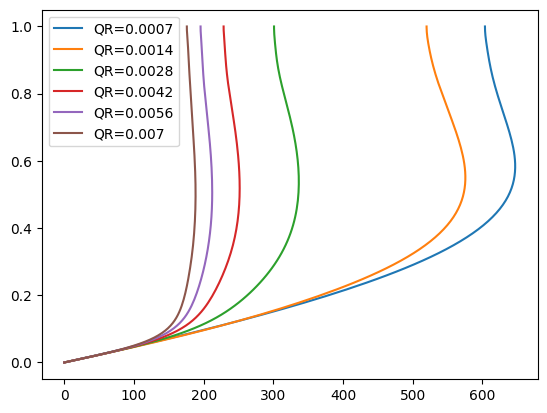

In [19]:
for i in range(nexp):
    label="QR="+str(QR[i])
    plt.plot(clock_av[i,:,:].mean(axis=0),ds[i]['z'],label=label)
    # print(clock_av[i,:,:].mean(axis=0))
plt.legend()
plt.show()

In [21]:
ntime,dummy,nz = ds[0]['horizontal avg C'].shape
print(ntime)
print(dummy)
# ntime = 600
Ddiffuflux = np.zeros((nexp,ntime,nz))
Mdiffuflux= np.zeros((nexp,ntime,nz))
Cdiffuflux = np.zeros((nexp,ntime,nz))
Dflux = np.zeros((nexp,ntime,nz))
Mflux= np.zeros((nexp,ntime,nz))
Cflux = np.zeros((nexp,ntime,nz))
Tflux = np.zeros((nexp,ntime,nz))
DReynoldsflux = np.zeros((nexp,ntime,nz))
MReynoldsflux= np.zeros((nexp,ntime,nz))
CReynoldsflux = np.zeros((nexp,ntime,nz))
avgC= np.zeros((nexp,ntime,nz))
avguz = np.zeros((nexp,ntime,nz))

for i,data in enumerate(ds):
    Ddiffuflux[i,:,:] = data['diffusive flux of dry buoyancy'][:ntime,0,:]
    Mdiffuflux[i,:,:] = data['diffusive flux of moist buoyancy'][:ntime,0,:]
    Cdiffuflux[i,:,:] = data['diffusive flux of clock tracer'][:ntime,0,:]
    DReynoldsflux[i,:,:] = data['Reynolds flux of dry buoyancy'][:ntime,0,:]
    MReynoldsflux[i,:,:] = data['Reynolds flux of moist buoyancy'][:ntime,0,:]
    CReynoldsflux[i,:,:] = data['Reynolds flux of clock tracer'][:ntime,0,:]
    TReynoldsflux[i,:,:] = data['Reynolds flux of tracer'][:ntime,0,:]
    Dflux[i,:,:] = data['horizontal avg vertical D flux'][:ntime,0,:]
    Mflux[i,:,:] = data['horizontal avg vertical M flux'][:ntime,0,:]
    Cflux[i,:,:] = data['horizontal avg vertical C flux'][:ntime,0,:]  
    Tflux[i,:,:] = data['horizontal avg vertical T flux'][:ntime,0,:]
    avgC[i,:,:] = data['horizontal avg C'][:ntime,0,:]
    avguz[i,:,:] = data['horizontal avg uz'][:ntime,0,:]
    

500
1


KeyError: 'Reynolds flux of tracer'

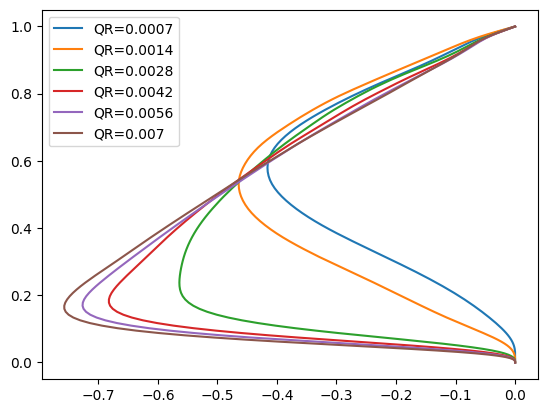

In [11]:
for i in range(nexp):
    label="QR="+str(QR[i])
    plt.plot(TReynoldsflux[i,:,:].mean(axis=0),ds[i]['z'],label=label)
plt.legend()
plt.show()

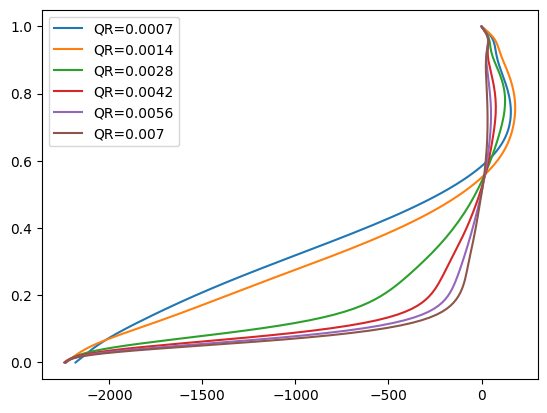

In [12]:
for i in range(nexp):
    label="QR="+str(QR[i])
    plt.plot(Cdiffuflux[i,:,:].mean(axis=0)/kappa,ds[i]['z'],label=label)
plt.legend()
plt.show()

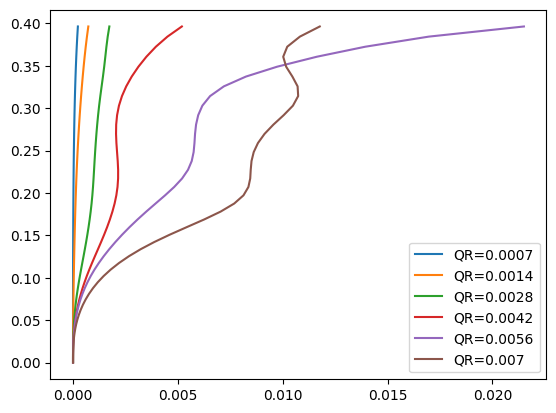

In [13]:
#Compute eddy Kappa
Kaeddy= -CReynoldsflux/(-Cdiffuflux/kappa)
#plot eddy Kappa
for i in range(nexp):
    label="QR="+str(QR[i])
    plt.plot(Kaeddy[i,0,:56],ds[i]['z'][:56],label=label)
plt.legend()
plt.show()

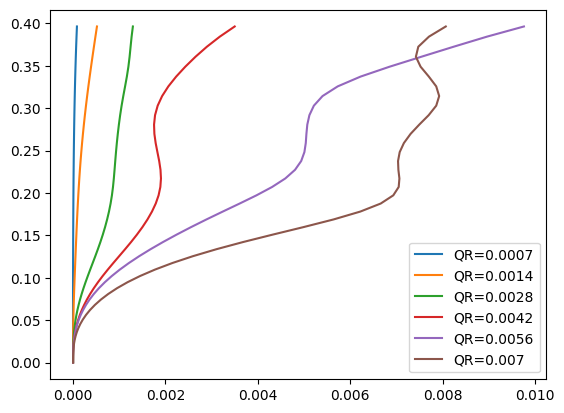

In [14]:
#Compute eddy Kappa
Kaeddy= -MReynoldsflux/(-Mdiffuflux/kappa)
#plot eddy Kappa
for i in range(nexp):
    label="QR="+str(QR[i])
    plt.plot(Kaeddy[i,0,:56],ds[i]['z'][:56],label=label)
plt.legend()
plt.show()

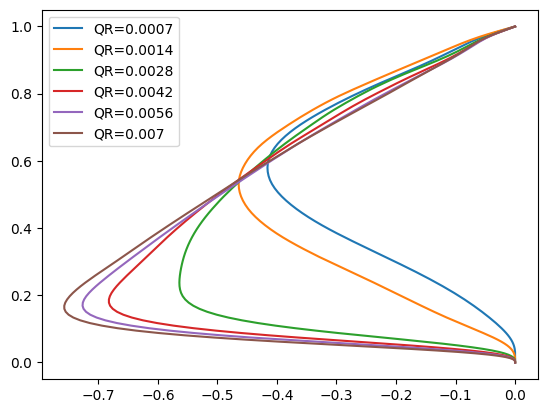

In [15]:
#horizontal avg C flux
for i in range(nexp):
    label="QR="+str(QR[i])
    plt.plot(Cflux[i,:,:].mean(axis=0),ds[i]['z'],label=label)
plt.legend()
plt.show()

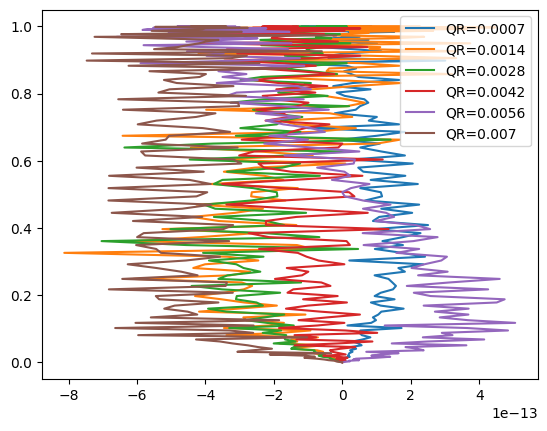

In [16]:
for i in range(nexp):
    label="QR="+str(QR[i])
    plt.plot((avgC[i,:,:]*avguz[i,:,:]).mean(axis=0)/kappa,ds[i]['z'],label=label)
plt.legend()
plt.show()

In [17]:
def clock_diffusion(z,clock,alpha,kappa):
    dcdz = np.zeros_like(clock)
    dcdz[0] = clock[1]
    dcdz[1] = kappa**(-1) * (-1 -  0 *   alpha * clock[0] - alpha * z * clock[1])
    return dcdz

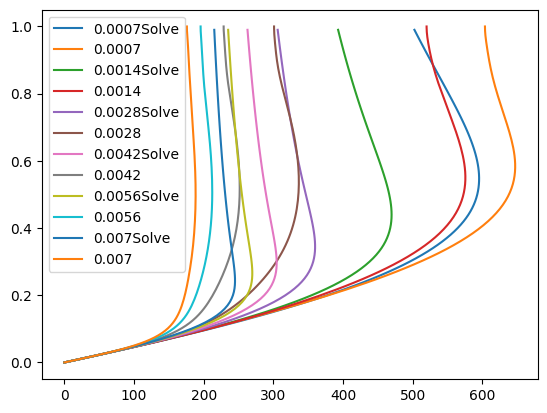

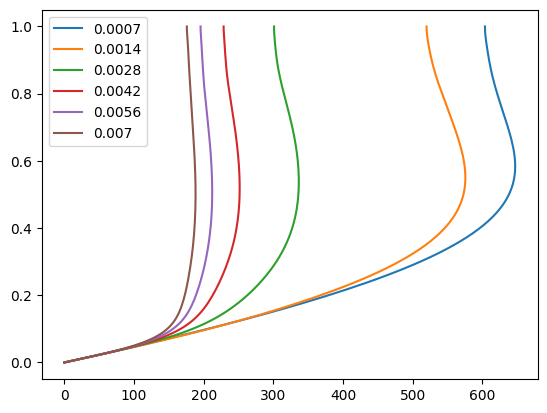

In [18]:
for i in range(0,nexp,1):
    alpha = QR[i] * 20 / np.pi
    test = scipy.integrate.solve_ivp(clock_diffusion,(0,1),y0 = [0,1/kappa], method='RK45', t_eval=np.arange(0,1,.01), args = (alpha, kappa))
    label=str(QR[i])+'Solve'
    plt.plot(test.y[0,:],test.t, label=label)
    plt.plot((ds[i]['horizontal avg C'])[:,0,:].mean('t'),ds[i]['z'],label=QR[i])
    plt.legend(QR)
    plt.legend()

plt.show()
for i in range(nexp):
    plt.plot((ds[i]['horizontal avg C'])[:,0,:].mean('t'),ds[i]['z'])
    plt.legend(QR)
plt.show()

In [19]:
test

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-02 ...  9.800e-01  9.900e-01]
        y: [[ 0.000e+00  2.221e+01 ...  2.154e+02  2.152e+02]
            [ 2.236e+03  2.203e+03 ... -2.316e+01 -2.291e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 206
     njev: 0
      nlu: 0